<a href="https://colab.research.google.com/github/Fernando181999/Practica3/blob/Fer-Castro/AnalisisData_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('/content/Automobile_data.csv')

df = pd.DataFrame(data)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [12]:
df_clean=df.drop(['engine-location','normalized-losses','num-of-doors'], axis=1,inplace=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'body-style',
       'drive-wheels', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.head()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


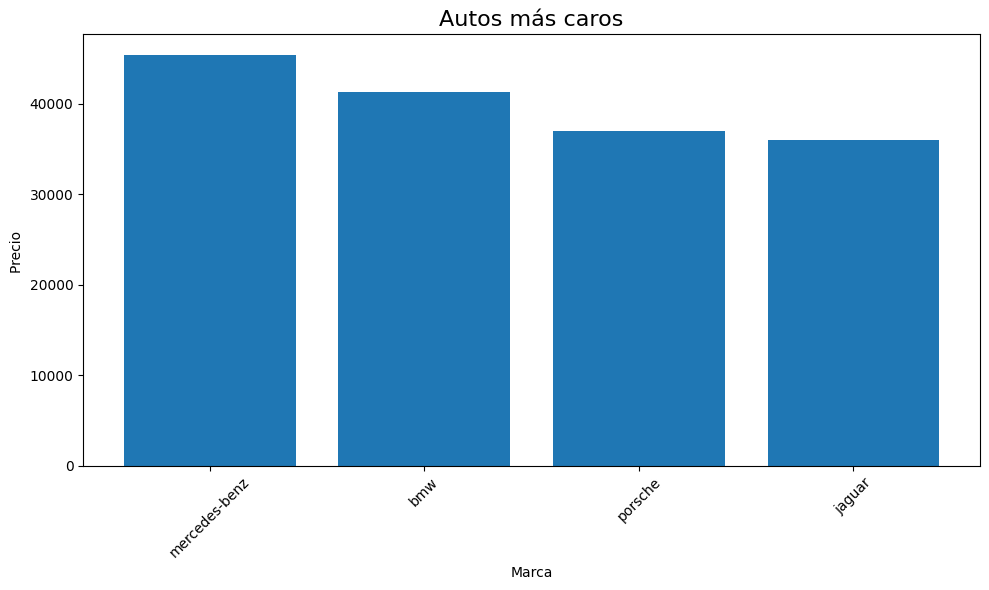

In [19]:
#Autos más caros
top_cars = df.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_cars['make'], top_cars['price'])
plt.title("Autos más caros", fontsize=16)
plt.xlabel("Marca")
plt.ylabel("Precio ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4114024916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="fuel-type", y="horsepower", split=True, palette="muted")


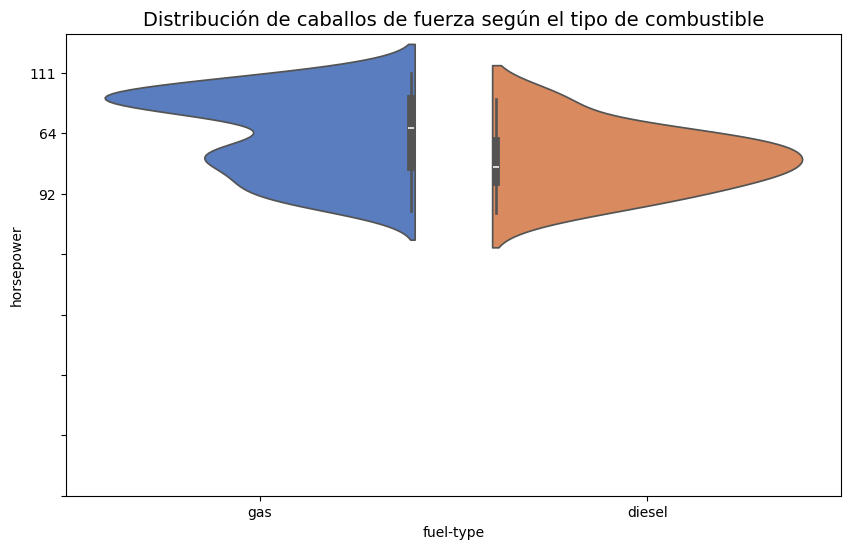

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="fuel-type", y="horsepower", split=True, palette="muted")
plt.title("Distribución de caballos de fuerza según el tipo de combustible", fontsize=14)
plt.yticks(range(0, 200, 25))
plt.show()

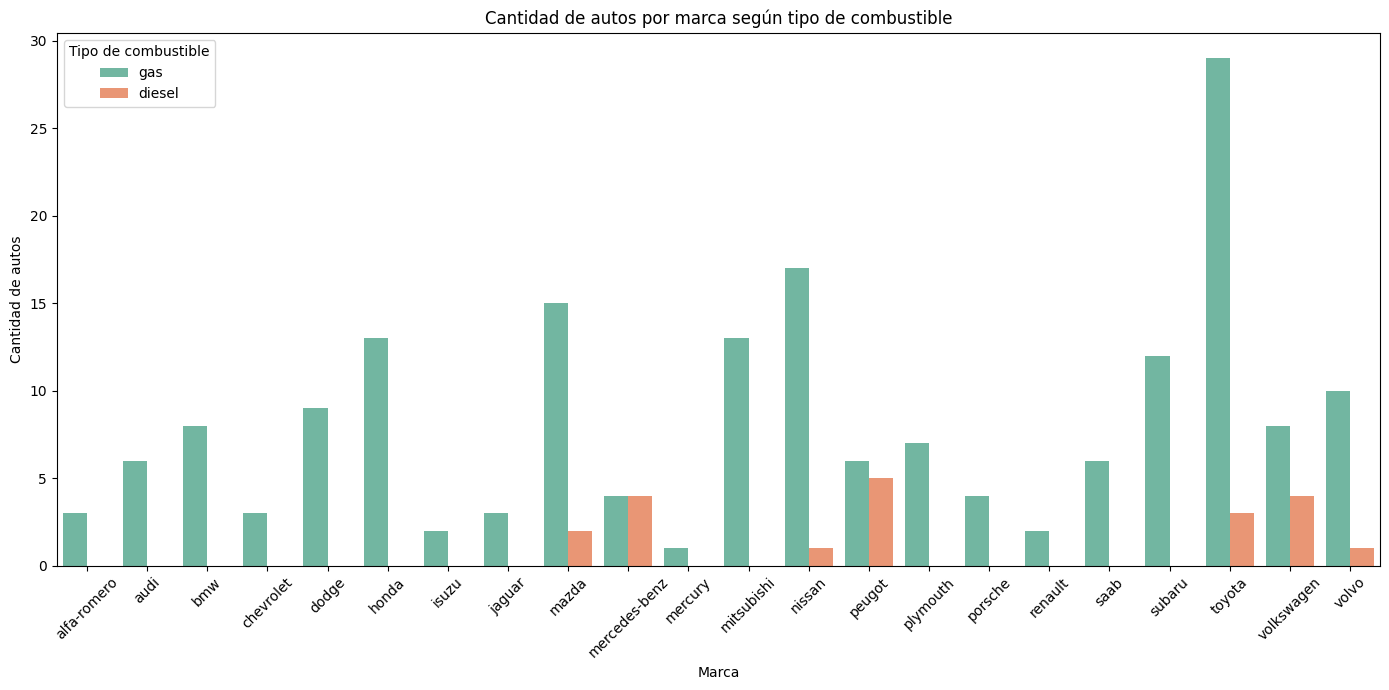

In [26]:
#Distribución de autos según el tipo de combustible por cada marca

total = df.groupby(['make', 'fuel-type']).size().reset_index(name='count')
plt.figure(figsize=(14,7))
sns.barplot(data=total, x='make', y='count', hue='fuel-type', palette='Set2')

plt.title('Cantidad de autos por marca según tipo de combustible')
plt.xlabel('Marca')
plt.ylabel('Cantidad de autos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de combustible')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3921023383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="engine-type", y="peak-rpm", palette="Set2")


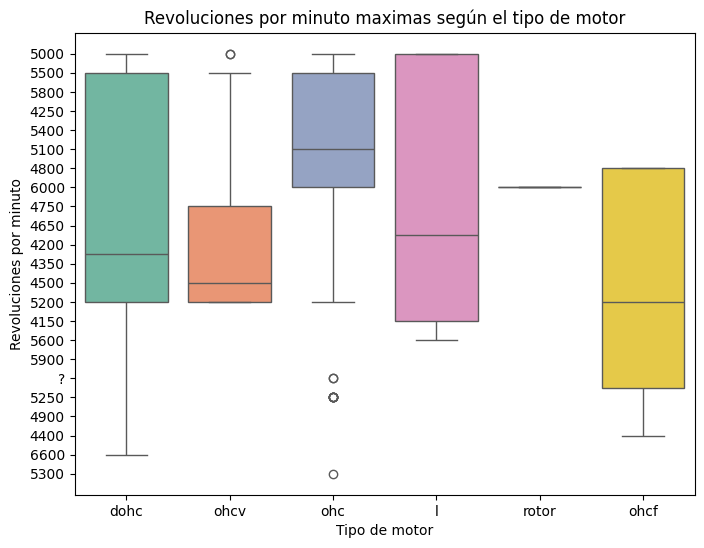

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="engine-type", y="peak-rpm", palette="Set2")
plt.title("Revoluciones por minuto maximas según el tipo de motor")
plt.xlabel("Tipo de motor")
plt.ylabel("Revoluciones por minuto")
plt.show()

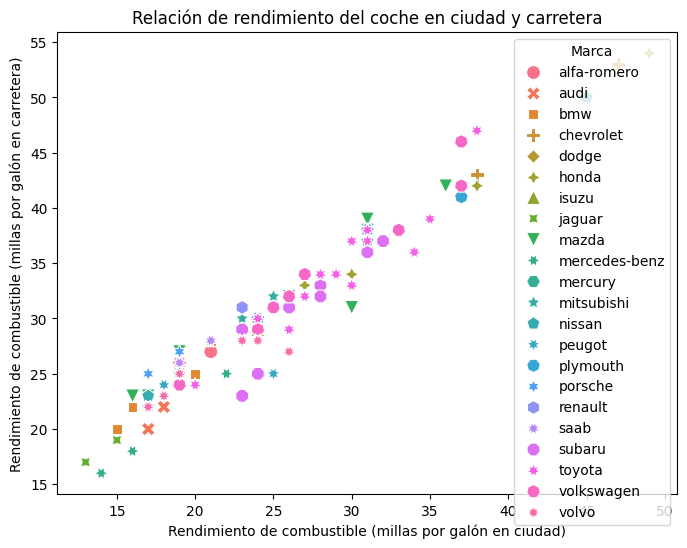

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="city-mpg", y="highway-mpg", hue="make", style="make", s=100)
plt.title("Relación de rendimiento del coche en ciudad y carretera")
plt.xlabel("Rendimiento de combustible (millas por galón en ciudad)")
plt.ylabel("Rendimiento de combustible (millas por galón en carretera)")
plt.legend(title="Marca")
plt.show()